In [1]:
%matplotlib inline
import numpy as np
import os
os.environ['KERAS_BACKEND'] = 'theano'
np.random.seed(123) # for reproducibility (???)

# sequential network model
from keras.models import Sequential 

# keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten

# keras convolutional layers
from keras.layers import Convolution2D, MaxPooling2D

# utilities
from keras.utils import np_utils

from keras.datasets import mnist

from keras import backend as K
K.set_image_dim_ordering('th')

# load preshuffled mnist data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using Theano backend.


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt

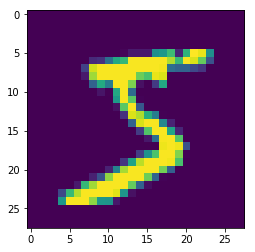

In [4]:
plt.imshow(X_train[0])

In [5]:
type(X_train)

numpy.ndarray

## Data Preprocessing

Theano requires knowing the image depth (eg: full RGB has a depth of 3)
These images have a depth of 1, we reshape to specify

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [7]:
X_train.shape

(60000, 1, 28, 28)

In [8]:
# what is the datatype
X_train.dtype

dtype('uint8')

In [9]:
# convert datatypes to float32
# normalize color channels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# aka one-hot vectors
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train.shape

(60000, 10)

In [12]:
Y_train[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

## Defining Model Architecture

In [13]:
# create sequential model
model = Sequential()

In [14]:
# create input layer
# shape parameter should be the shape of a single example (in this case, 1, 28, 28)
# first three parameters are:
# 1. # of convolution filters
# 2. number of rows in each convolution kernel
# 3. number of columns in each convolution kernel

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/home/asadik/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`


In [15]:
print(model.output_shape)

(None, 32, 26, 26)


In [16]:
# let's add some more layers
model.add(Convolution2D(32, 3, 3, activation='relu'))
# maxpool reduces params by sliding 2x2 pooling filter across previous
# layer. takes the max of the four values therein
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/asadik/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app


In [17]:
# now let's add fully connected layer and output layer
# flattening weights before passingn to fully connected layer
# flattening means making them 1 dimensional
model.add(Flatten())
# first param is output size of layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile model

In [18]:
# compile model, declaring loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Fit model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1)

/home/asadik/miniconda3/envs/keras/lib/python3.6/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
60000/60000 [==============================] - 133s - loss: 0.2040 - acc: 0.9377   
Epoch 2/25
60000/60000 [==============================] - 144s - loss: 0.0842 - acc: 0.9744   
Epoch 3/25
60000/60000 [==============================] - 145s - loss: 0.0647 - acc: 0.9804   
Epoch 4/25
60000/60000 [==============================] - 144s - loss: 0.0530 - acc: 0.9832   
Epoch 5/25
60000/60000 [==============================] - 149s - loss: 0.0464 - acc: 0.9858   
Epoch 6/25
60000/60000 [==============================] - 146s - loss: 0.0394 - acc: 0.9876   
Epoch 7/25
60000/60000 [==============================] - 145s - loss: 0.0365 - acc: 0.9887   
Epoch 8/25
 4672/60000 [=>............................] - ETA: 147s - loss: 0.0232 - acc: 0.9912

## Evaluate on test data

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)